In [1]:
!git clone https://github.com/adithyamn/Autonomous-Car

fatal: destination path 'Autonomous-Car' already exists and is not an empty directory.


In [7]:
!dir Autonomous-Car

 Volume in drive D is Folders
 Volume Serial Number is 1439-525E

 Directory of D:\Folders\Autonomous Car\Jupyter\Autonomous-Car

21-03-2020  07:53    <DIR>          .
21-03-2020  07:53    <DIR>          ..
21-03-2020  07:53         1,132,575 driving_log.csv
21-03-2020  07:53    <DIR>          IMG
               1 File(s)      1,132,575 bytes
               3 Dir(s)  150,975,168,512 bytes free


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import os 
import ntpath
from sklearn.utils import shuffle

Using TensorFlow backend.


In [11]:
datadir ='Autonomous-Car'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'] #Applying names to all columns in the csv file
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', 0) #max column width is viewed
data.head() #Data is displayed           

,center,left,right,steering,throttle,reverse,speed
0,D:\Folders\Autonomous Car\Data\IMG\center_2020_03_20_10_00_02_392.jpg,D:\Folders\Autonomous Car\Data\IMG\left_2020_03_20_10_00_02_392.jpg,D:\Folders\Autonomous Car\Data\IMG\right_2020_03_20_10_00_02_392.jpg,0.0,0.0,0.0,0.000080
1,D:\Folders\Autonomous Car\Data\IMG\center_2020_03_20_10_00_02_508.jpg,D:\Folders\Autonomous Car\Data\IMG\left_2020_03_20_10_00_02_508.jpg,D:\Folders\Autonomous Car\Data\IMG\right_2020_03_20_10_00_02_508.jpg,0.0,0.0,0.0,0.000080
2,D:\Folders\Autonomous Car\Data\IMG\center_2020_03_20_10_00_02_608.jpg,D:\Folders\Autonomous Car\Data\IMG\left_2020_03_20_10_00_02_608.jpg,D:\Folders\Autonomous Car\Data\IMG\right_2020_03_20_10_00_02_608.jpg,0.0,0.0,0.0,0.000083
3,D:\Folders\Autonomous Car\Data\IMG\center_2020_03_20_10_00_02_716.jpg,D:\Folders\Autonomous Car\Data\IMG\left_2020_03_20_10_00_02_716.jpg,D:\Folders\Autonomous Car\Data\IMG\right_2020_03_20_10_00_02_716.jpg,0.0,0.0,0.0,0.000078
4,D:\Folders\Autonomous Car\Data\IMG\center_2020_03_20_10_00_02_837.jpg,D:\Folders\Autonomous Car\Data\IMG\left_2020_03_20_10_00_02_837.jpg,D:\Folders\Autonomous Car\Data\IMG\right_2020_03_20_10_00_02_837.jpg,0.0,0.0,0.0,0.000078


In [12]:
def path_leaf(path): #this function helps in removing the path befre the img data file name
    head, tail = ntpath.split(path)
    return tail
#Applying to all necessary columns
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_03_20_10_00_02_392.jpg,left_2020_03_20_10_00_02_392.jpg,right_2020_03_20_10_00_02_392.jpg,0.0,0.0,0.0,0.000080
1,center_2020_03_20_10_00_02_508.jpg,left_2020_03_20_10_00_02_508.jpg,right_2020_03_20_10_00_02_508.jpg,0.0,0.0,0.0,0.000080
2,center_2020_03_20_10_00_02_608.jpg,left_2020_03_20_10_00_02_608.jpg,right_2020_03_20_10_00_02_608.jpg,0.0,0.0,0.0,0.000083
3,center_2020_03_20_10_00_02_716.jpg,left_2020_03_20_10_00_02_716.jpg,right_2020_03_20_10_00_02_716.jpg,0.0,0.0,0.0,0.000078
4,center_2020_03_20_10_00_02_837.jpg,left_2020_03_20_10_00_02_837.jpg,right_2020_03_20_10_00_02_837.jpg,0.0,0.0,0.0,0.000078


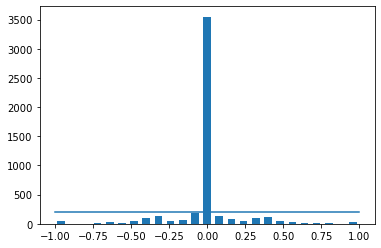

In [13]:
#Visualising the data
num_bins = 25 
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+bins[1:]) * 0.5 #specifyinng height as the center value as it is the maximum in number when the data was collected
plt.bar(center, hist, width = 0.05)
#Keeping a Threshold so that the CNN isnt skewed towards predicting zeros
#All the samples above the threshold is rejected
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 4881
removed: 3350
remaining: 1531


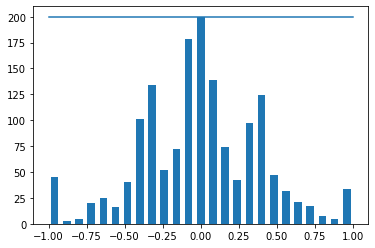

In [14]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]: #Here the angle of steering which falls between the 2 categories are made the append the current j being interated through
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [15]:
print(data.iloc[1])

def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2] #Getting the data from various indeces
    
    #Center image append
    image_path.append(os.path.join(datadir, center.strip())) #Strip - removes the path and keeps the relevant path only
    steering.append(float(indexed_data[3]))
    
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    
     #right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)


center      center_2020_03_20_10_00_03_255.jpg
left        left_2020_03_20_10_00_03_255.jpg  
right       right_2020_03_20_10_00_03_255.jpg 
steering   -0.092781                          
throttle    1                                 
reverse     0                                 
speed       2.37262                           
Name: 8, dtype: object


In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 3674
Valid Samples: 919


Text(0.5, 1.0, 'Validation set')

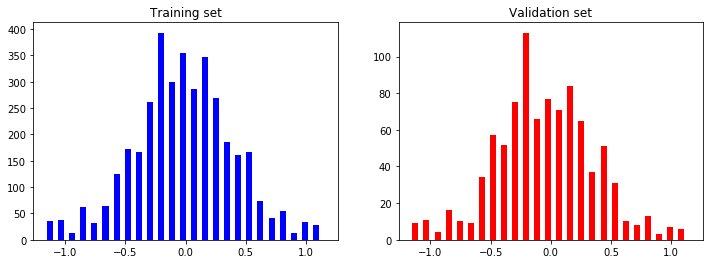

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1, 'PreProcessed Image')

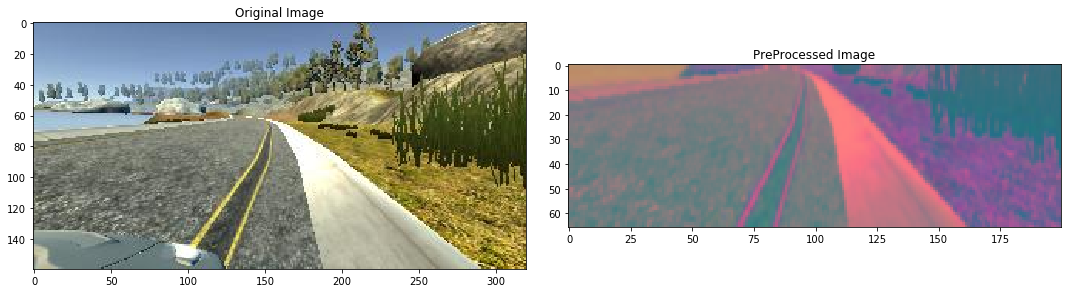

In [18]:
#PreProcessing Image Data
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200, 66))
    img= img/255
    return img

image = image_paths[200]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('PreProcessed Image')

In [19]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(3674, 66, 200, 3)


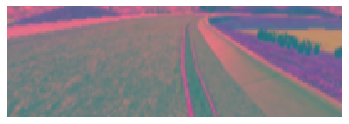

In [20]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)]) #Chooses a random image via random function and maps all the X__train images to the pre-processed images
plt.axis('off')
print(X_train.shape)

In [21]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='relu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    #model.add(Dropout(0.5))
  
    model.add(Flatten())
    
    model.add(Dense(100, activation = 'relu'))
    #model.add(Dropout(0.5))
  
    model.add(Dense(50, activation = 'relu'))
    #model.add(Dropout(0.5)) 
    
    model.add(Dense(10, activation = 'relu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(1))
  
    optimizer = Adam(lr=1e-4)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [22]:
model = nvidia_model()
print(model.summary())

c:\program files\python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="relu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

c:\program files\python\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  after removing the cwd from sys.path.
c:\program files\python\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  """
c:\program files\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\program files\python\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size = 100, verbose = 1, shuffle = 1)

Train on 3674 samples, validate on 919 samples
Epoch 1/30
3674/3674 [==============================] - 8s 2ms/step - loss: 0.1701 - val_loss: 0.1641
Epoch 2/30
3674/3674 [==============================] - 2s 647us/step - loss: 0.1436 - val_loss: 0.1269
Epoch 3/30
3674/3674 [==============================] - 2s 641us/step - loss: 0.1114 - val_loss: 0.1082
Epoch 4/30
3674/3674 [==============================] - 2s 631us/step - loss: 0.0985 - val_loss: 0.1107
Epoch 5/30
3674/3674 [==============================] - 2s 631us/step - loss: 0.0927 - val_loss: 0.0802
Epoch 6/30
3674/3674 [==============================] - 2s 633us/step - loss: 0.0790 - val_loss: 0.0705
Epoch 7/30
3674/3674 [==============================] - 2s 630us/step - loss: 0.0726 - val_loss: 0.0685
Epoch 8/30
3674/3674 [==============================] - 2s 629us/step - loss: 0.0693 - val_loss: 0.0665
Epoch 9/30
3674/3674 [==============================] - 2s 640us/step - loss: 0.0681 - val_loss: 0.0661
Epoch 10/30
3674/36

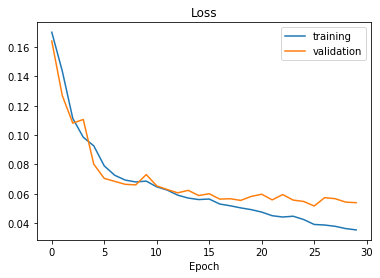

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')
model.save('model1.h5')


In [25]:
model.save('hist.h5')